In [23]:
from sklearn.datasets import (make_classification, make_regression,
                              make_blobs, make_circles, make_moons)
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from pandas.plotting import scatter_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.model_selection import GridSearchCV
sns.set()

In [137]:
X, y = make_classification(n_samples=200,n_features=5,n_classes=2,n_informative=3,n_redundant=2)

In [138]:
df = pd.DataFrame(np.column_stack((X,y)),columns=['f1','f2','f3','f4','f5','labels'])

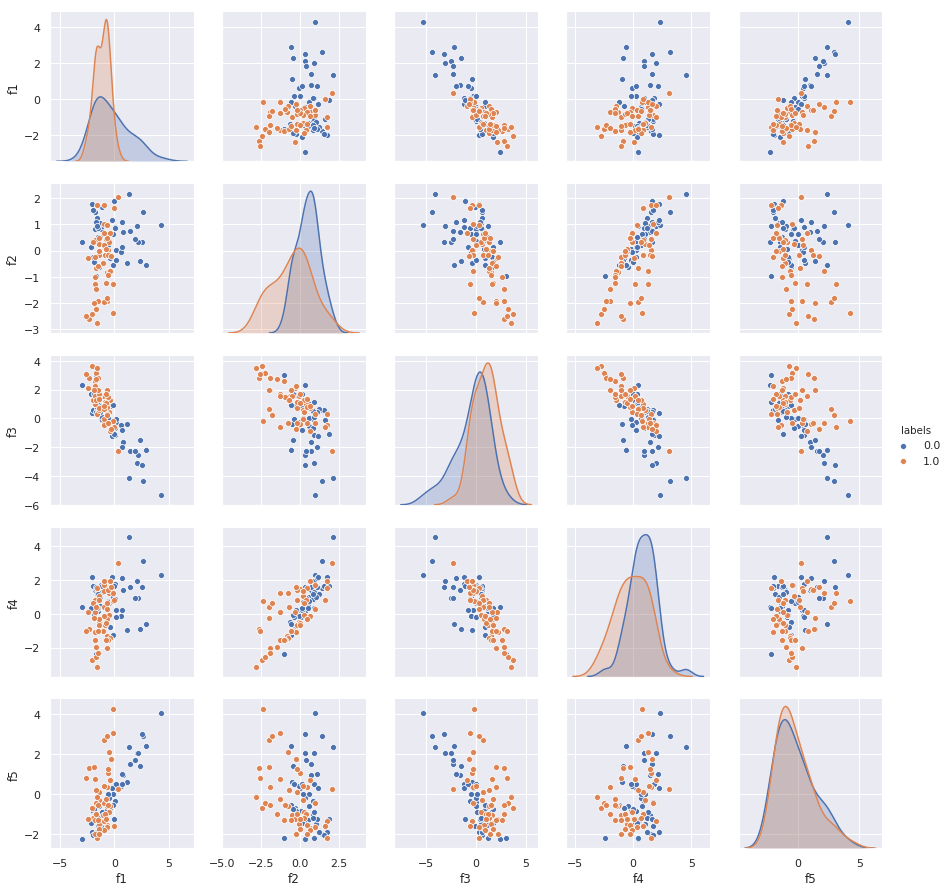

In [19]:
sns.pairplot(df, hue='labels',vars=df.columns[:-1])
plt.show()

In [110]:
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.model_selection import train_test_split

In [126]:
def plot(model,X,y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
    trainerrors, valerrors = [], []
    for m in range(2, len(X_train)):
        model.fit(X_train[:m],y_train[:m])
        y_train_predict = model.predict_proba(X_train[:m])
        y_train_predict = (y_train_predict[:,1] > 0.5)*1
        y_val_predict = model.predict_proba(X_val)
        y_val_predict = (y_val_predict[:,1] > 0.5)*1
        trainerrors.append(accuracy_score(y_train[:m],y_train_predict))
        valerrors.append(accuracy_score(y_val,y_val_predict))
    plt.plot(trainerrors,"r-+",linewidth=2, label='train')
    plt.plot(valerrors,'b-',linewidth=3, label='val')

In [139]:
rf_class = RandomForestClassifier(n_jobs=4,n_estimators=20,random_state=42)

In [148]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)

In [140]:
rf_class.fit(df.iloc[:,:-1],df.iloc[:,-1])

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=4,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [105]:
y_pred = rf_class.predict_proba(X_train)

In [106]:
y_pred_clsf = (y_pred[:,1] > 0.5)*1

In [107]:
confusion_matrix(y_train,y_pred_clsf)

array([[42,  0],
       [ 0, 38]])

In [108]:
y_pred_val = rf_class.predict_proba(X_val)
y_val_pred_clsf = (y_pred_val[:,1] > 0.5)*1

In [109]:
confusion_matrix(y_val,y_val_pred_clsf)

array([[ 7,  1],
       [ 2, 10]])

In [111]:
accuracy_score(y_val,y_val_pred_clsf)

0.85

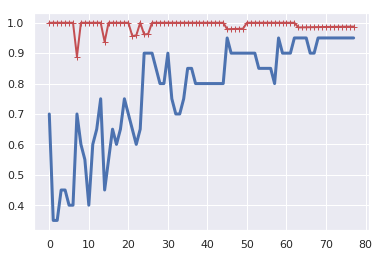

In [127]:
plot(rf_class,X,y)

In [130]:
import lime
import lime.lime_tabular

In [131]:
predict_fn_rf = lambda x: rf_class.predict_proba(x).astype(float)

In [145]:
features = list(df.columns[:-1])

In [149]:
explainer = lime.lime_tabular.LimeTabularExplainer(X_train, feature_names= features, class_names=['0','1'])

In [157]:
observ = 4
exp = explainer.explain_instance(X_val[observ], predict_fn_rf, num_features=5)
exp.show_in_notebook(show_all=False)

In [159]:
lista = list(zip(df.columns,rf_class.feature_importances_))

In [164]:
pd.DataFrame(sorted(lista,key = lambda x:x[1],reverse=True)).set_index(0)

,1
0,
f2,0.284160
f3,0.252125
f5,0.177612
f1,0.163584
f4,0.122518
